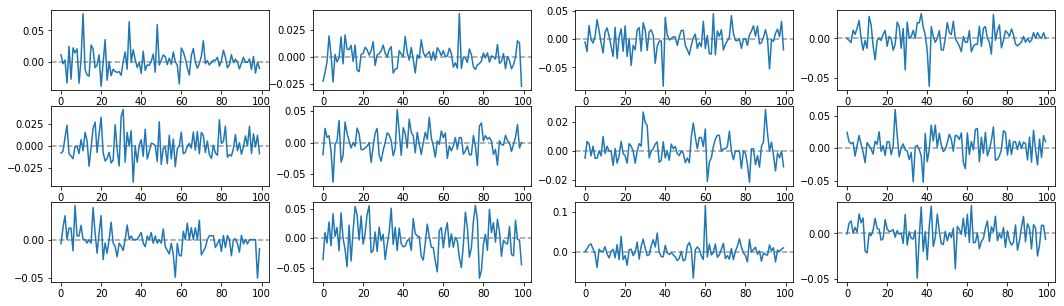

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import evaluate_model.create_dataset as create_ds
import torch
from tqdm import tqdm

#create the dataloader
dataset = create_ds.WindowsDaset(r'data\dataset_100_winds')
#plotsome series
rows = 3
columns = 4
fig, axs = plt.subplots(rows, columns, figsize=(18,5), facecolor = 'white')
for ax, i in zip(axs.ravel(),np.random.randint(0, len(dataset),size=rows * columns)):
    ax.axhline(0, color = 'black', alpha =0.4, ls = '--')
    ax.plot(dataset[i])

In [75]:
maxes = np.zeros(len(dataset))
mins  = np.zeros(len(dataset))
for index, i in tqdm(enumerate(dataset)):
    maxes[index] = i.max().item()
    mins[index]  = i.min().item()

q_max   = np.quantile(maxes,[0.1 * i for i in range(1,10)])
q_min   = np.quantile(abs(mins),[0.1 * i for i in range(1,10)])*-1

10353it [01:09, 148.14it/s]


In [121]:
distances_max = np.zeros(len(dataset))
for index, i in tqdm(enumerate(dataset)):
    max_2, max_1 = (i.sort()[0][-2:])
    distances_max[index] = max_1 - max_2


10353it [01:10, 146.14it/s]
10353it [01:14, 138.90it/s]


In [126]:
distances_min = np.zeros(len(dataset))
for index, i in tqdm(enumerate(dataset)):
    min_1, min_2 = (i.sort()[0][:2])
    distances_min[index] = abs(min_2) - abs(min_1)

10353it [01:10, 146.85it/s]


In [128]:
dist_q_max = np.quantile(distances_max,[0.1 * i for i in range(1,10)])
dist_q_min = np.quantile(distances_min,[0.1 * i for i in range(1,10)])

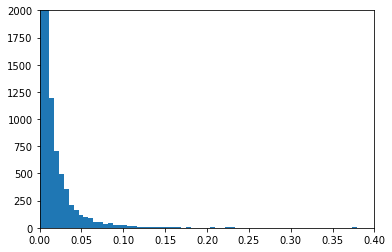

In [72]:
plt.figure(facecolor='white')
plt.ylim(0,2000)
plt.xlim(0,0.4)
_ = plt.hist(distances, bins=1000)

In [177]:
sampl = np.random.uniform(low=-1400, high=1400, size=(100,))

In [183]:
def scale_by_max(max,min, sample):
    max_pick = np.random.uniform(low=max[0], high=max[1])
    min_pick = np.random.uniform(low=min[0], high=min[1])

    max_sample = sample.max().item()
    min_sample = sample.min().item()

    X_std = (sample - min_sample) / (max_sample - min_sample)
    X_scaled = X_std * (max_pick - min_pick) + min_pick
    
    return X_scaled

In [174]:
def scale_sample(q_dist_max, q_dist_min ,sample, q_max ,q_min):
    max_2, max_1 = (sample.sort()[0][-2:])
    dist = max_1 - max_2
    dist = (dist/(abs(sample.min())+sample.max())).item()

    sorted_q   = np.sort(np.append(q_dist_max,dist))
    dist_index =  np.where(sorted_q == dist)[0]
    if dist_index >= 9:
        low_rnd_max = q_max[9]
        up_rnd_max  = q_max[9]+0.1
    elif dist_index == 0:
        up_rnd_max  = q_max[0]
        low_rnd_max = q_max[0] -0.01
    else:
        low_rnd_max = q_max[dist_index-1]
        up_rnd_max  = q_max[dist_index]
    
    max_pick = np.random.uniform(low=low_rnd_max, high=up_rnd_max)

    #pick value for min
    min_1, min_2 = (sample.sort()[0][:2])
    dist_min = abs(min_2) - abs(min_1)
    dist_min = (dist_min/(abs(sample.min())+sample.max())).item()

    sorted_q_min   = np.sort(np.append(q_dist_min,dist_min))
    dist_index_min =  np.where(sorted_q_min == dist_min)[0]

    if dist_index_min >= 9:
        low_rnd_min = q_min[9]
        up_rnd_min  = q_min[9]+0.01
    elif dist_index_min == 0:
        up_rnd_min  = q_min[0]
        low_rnd_min = q_min[0] -0.1
    else:
        low_rnd_min = q_min[dist_index_min-1]
        up_rnd_min = q_min[dist_index_min]
    min_pick = np.random.uniform(low=low_rnd_min, high=up_rnd_min)


    print(min_pick)
    max_sample = sample.max().item()
    min_sample = sample.min().item()

    X_std = (sample - min_sample) / (max_sample - min_sample)
    X_scaled = X_std * (max_pick - min_pick) + min_pick

    return X_scaled

In [180]:
scaled_p = scale_sample(dist_q_max, dist_q_min, torch.tensor(sampl), q_max,q_min)

[-0.0808056]


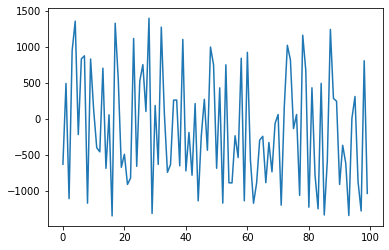

In [178]:
plt.figure(facecolor ='white')
plt.plot(sampl)

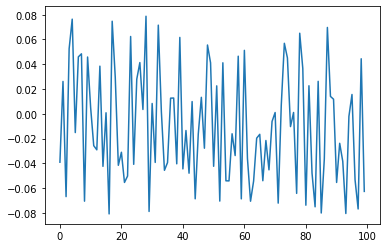

In [182]:
plt.figure(facecolor='white')
plt.plot(scaled_p)

In [181]:
pr = scale_sample(max = q_max, min = q_min, sample = sampl)
plt.figure(facecolor='white')
plt.plot(pr)

TypeError: scale_sample() got an unexpected keyword argument 'max'